In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('Student_Performance.csv')

In [3]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [6]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [7]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [8]:
data = data.rename(columns={'Hours Studied':'hr_studied','Extracurricular Activities': 'ECA','Sleep Hours':'sleep_hr', 'Sample Question Papers Practiced':'SQPP', 'Performance Index':'PI'})
data

,hr_studied,Previous Scores,ECA,sleep_hr,SQPP,PI
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [9]:
num_cols = data.select_dtypes(include = 'number').columns
num_cols

Index(['hr_studied', 'Previous Scores', 'sleep_hr', 'SQPP', 'PI'], dtype='object')

In [10]:
cat_cols = data.select_dtypes(exclude = 'number').columns
cat_cols

Index(['ECA'], dtype='object')

# EDA

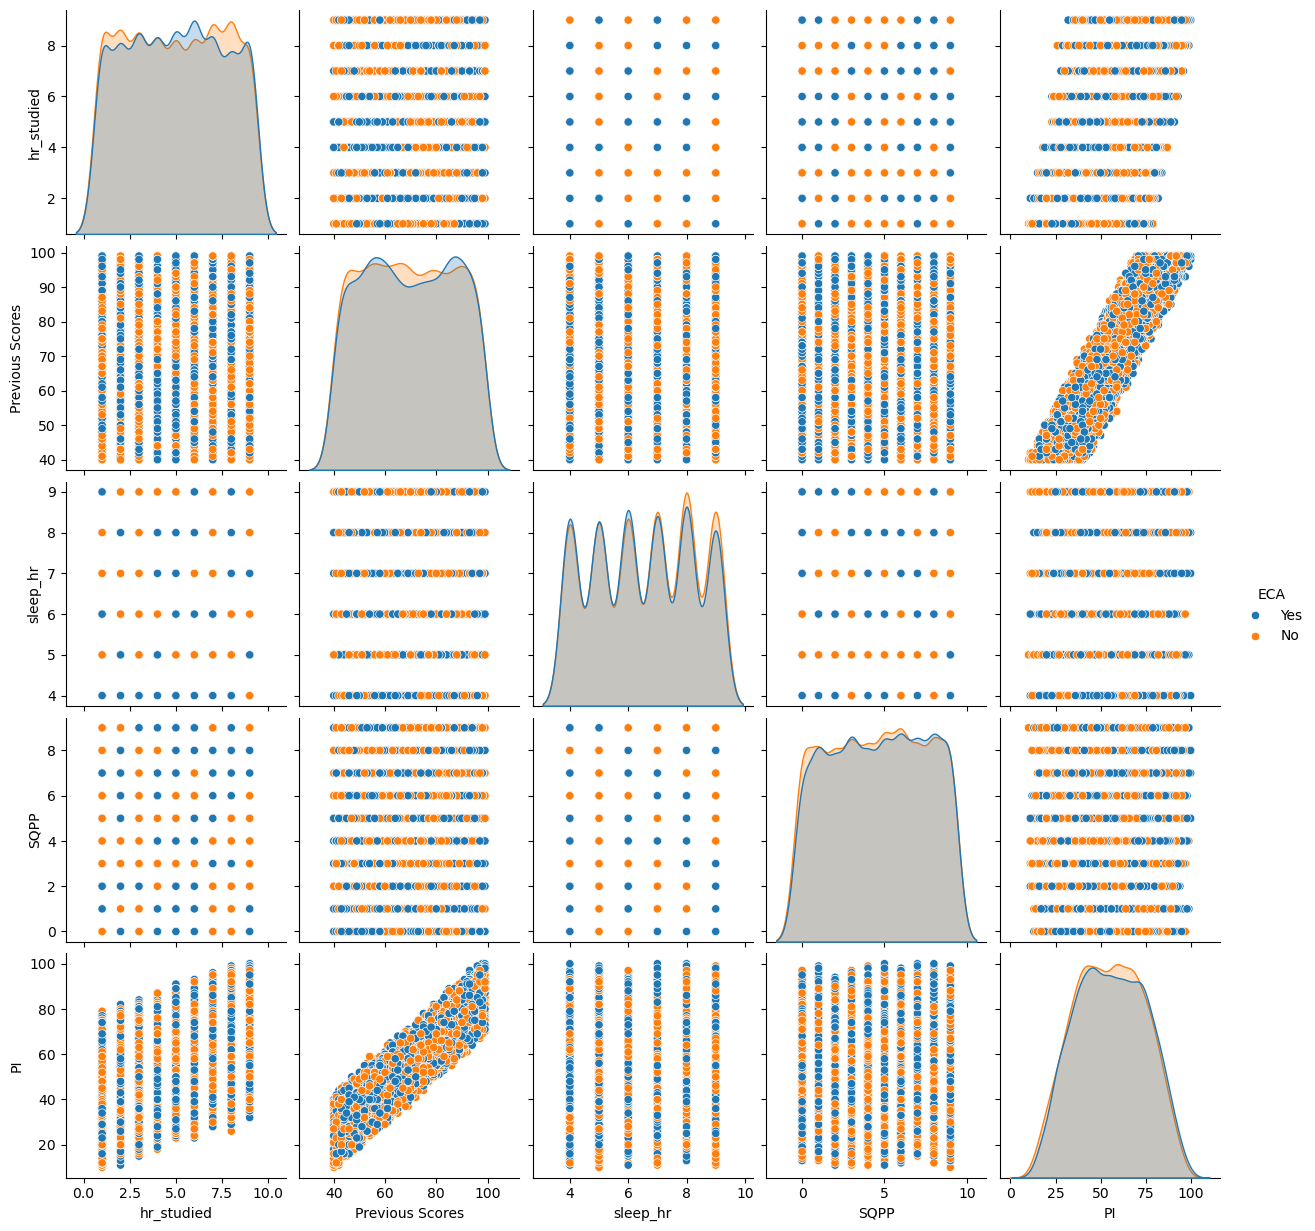

In [11]:
sns.pairplot(data=data, hue='ECA')

array([[<Axes: title={'center': 'hr_studied'}>,
        <Axes: title={'center': 'Previous Scores'}>],
       [<Axes: title={'center': 'sleep_hr'}>,
        <Axes: title={'center': 'SQPP'}>],
       [<Axes: title={'center': 'PI'}>, <Axes: >]], dtype=object)

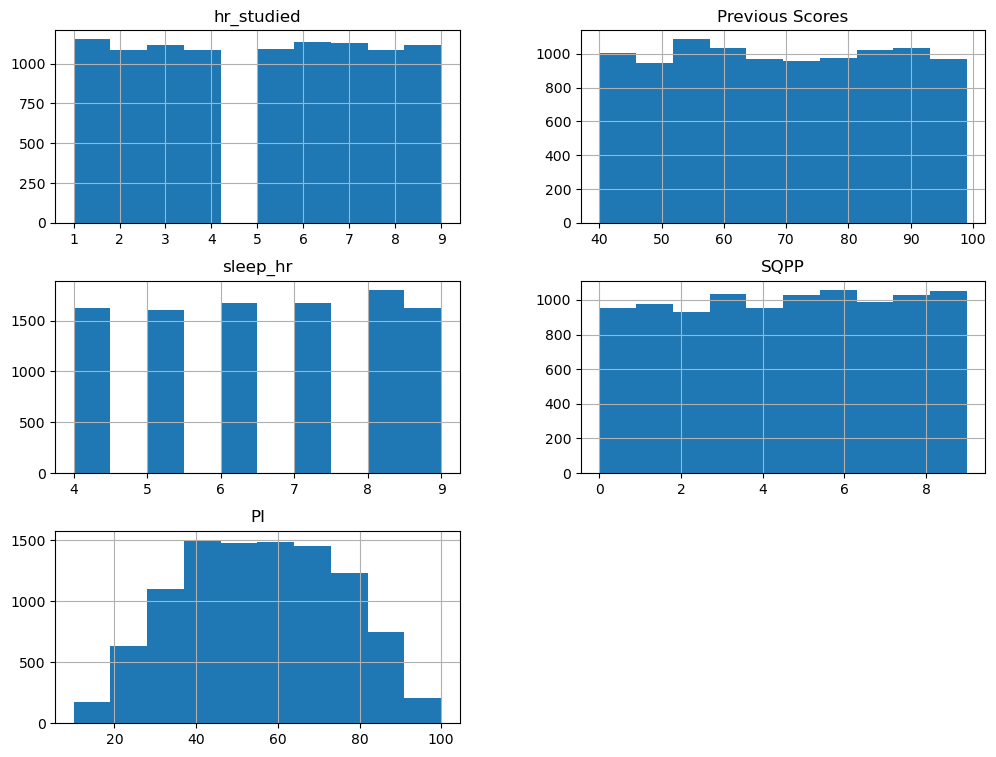

In [12]:
data[num_cols].hist(figsize=(12,9))

<Axes: xlabel='ECA', ylabel='count'>

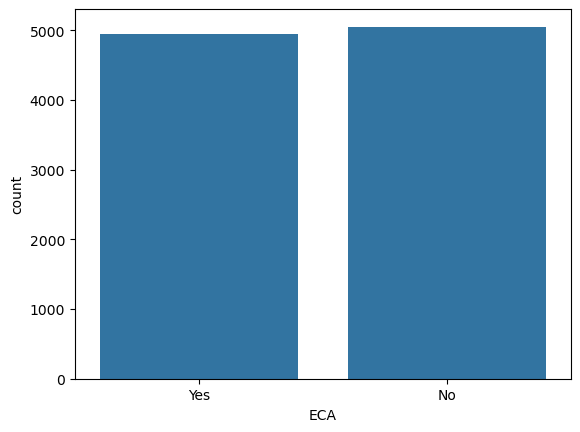

In [13]:
sns.countplot(x = data['ECA'])

In [14]:
data.loc[data['ECA']=='No'].describe()

,hr_studied,Previous Scores,sleep_hr,SQPP,PI
count,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000
mean,4.982977,69.302059,6.569675,4.546120,54.758511
std,2.604176,17.326080,1.700995,2.879836,19.152068
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,84.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,99.000000


In [15]:
data.loc[data['ECA']=='Yes'].describe()

,hr_studied,Previous Scores,sleep_hr,SQPP,PI
count,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
mean,5.003032,69.592361,6.490703,4.621261,55.700889
std,2.574264,17.361091,1.689847,2.854332,19.264416
min,1.000000,40.000000,4.000000,0.000000,11.000000
25%,3.000000,54.750000,5.000000,2.000000,41.000000
50%,5.000000,70.000000,6.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


<Axes: >

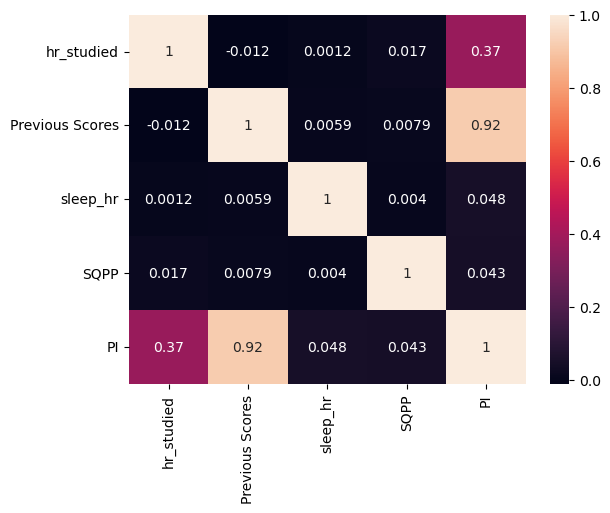

In [16]:
sns.heatmap(data.corr(numeric_only=True), annot=True)

# Label Encoding

In [26]:
enc = OneHotEncoder(sparse_output=False, drop='if_binary')

In [33]:
encoded = enc.fit_transform(pd.DataFrame(data['ECA']))

In [30]:
enc.categories_

[array(['No', 'Yes'], dtype=object)]

In [31]:
enc.get_feature_names_out()

array(['ECA_Yes'], dtype=object)

In [34]:
encoded_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out())
encoded_df

,ECA_Yes
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
9995,1.0
9996,1.0
9997,1.0
9998,1.0


In [35]:
data_encoded = pd.concat([data, encoded_df], axis=1)
data_encoded

,hr_studied,Previous Scores,ECA,sleep_hr,SQPP,PI,ECA_Yes
0,7,99,Yes,9,1,91.0,1.0
1,4,82,No,4,2,65.0,0.0
2,8,51,Yes,7,2,45.0,1.0
3,5,52,Yes,5,2,36.0,1.0
4,7,75,No,8,5,66.0,0.0
...,...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0,1.0
9996,7,64,Yes,8,5,58.0,1.0
9997,6,83,Yes,8,5,74.0,1.0
9998,9,97,Yes,7,0,95.0,1.0
